In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_dataset = 'data/dataset.csv'

df = pd.read_csv(url_dataset, sep=';')
df

uuid  default  \
0      63f69b2c-8b1c-4740-b78d-52ed9a4515ac      0.0   
1      0e961183-8c15-4470-9a5e-07a1bd207661      0.0   
2      d8edaae6-4368-44e0-941e-8328f203e64e      0.0   
3      0095dfb6-a886-4e2a-b056-15ef45fdb0ef      0.0   
4      c8f8b835-5647-4506-bf15-49105d8af30b      0.0   
...                                     ...      ...   
99971  5c03bc63-ea65-4ffd-aa7b-95ea9a46db34      NaN   
99972  f8db22f4-9819-420c-abbc-9ddf1843176e      NaN   
99973  b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8      NaN   
99974  bafcab15-9898-479c-b729-c9dda7edb78f      NaN   
99975  ac88f18c-96a6-49bc-9e9d-a780225914af      NaN   

       account_amount_added_12_24m  account_days_in_dc_12_24m  \
0                                0                        0.0   
1                                0                        0.0   
2                                0                        0.0   
3                                0                        NaN   
4                                0                        0.0   
...                            ...                        ...   
99971                            0                        0.0   
99972                            0                        0.0   
99973                        45671                        0.0   
99974                        56102                        0.0   
99975                            0                        0.0   

       account_days_in_rem_12_24m  account_days_in_term_12_24m  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             NaN                          NaN   
4                             0.0                          0.0   
...                           ...                          ...   
99971                         0.0                          0.0   
99972                         0.0                          0.0   
99973                        20.0                          0.0   
99974                         0.0                          0.0   
99975                         0.0                          0.0   

       account_incoming_debt_vs_paid_0_24m  account_status  \
0                                 0.000000             1.0   
1                                      NaN             1.0   
2                                      NaN             NaN   
3                                      NaN             NaN   
4                                      NaN             NaN   
...                                    ...             ...   
99971                                  NaN             1.0   
99972                             0.004044             1.0   
99973                             0.705078             2.0   
99974                             0.064175             1.0   
99975                                  NaN             1.0   

       account_worst_status_0_3m  account_worst_status_12_24m  ...  \
0                            1.0                          NaN  ...   
1                            1.0                          1.0  ...   
2                            NaN                          NaN  ...   
3                            NaN                          NaN  ...   
4                            NaN                          NaN  ...   
...                          ...                          ...  ...   
99971                        1.0                          NaN  ...   
99972                        1.0                          NaN  ...   
99973                        2.0                          2.0  ...   
99974                        2.0                          1.0  ...   
99975                        1.0                          NaN  ...   

       status_3rd_last_archived_0_24m  status_max_archived_0_6_months  \
0                                   1                               1   
1                                   1                       

### Preparing the dataset

In [3]:
df.default.value_counts()

0.0    88688
1.0     1288
Name: default, dtype: int64

In [4]:
df.default.isna().sum()

10000

In [5]:
df.default.tail(10000).isna().sum()

10000

In [6]:
df_to_predict = df.tail(10000).copy()

In [7]:
df = df.loc[:89975]

## Removing columns above 20% of NA

In [8]:
df.isnull().sum().sort_values(ascending=False)/len(df)

worst_status_active_inv                0.695074
account_worst_status_12_24m            0.667456
account_worst_status_6_12m             0.603639
account_incoming_debt_vs_paid_0_24m    0.593014
account_worst_status_3_6m              0.577243
account_status                         0.543856
account_worst_status_0_3m              0.543856
avg_payment_span_0_3m                  0.493265
avg_payment_span_0_12m                 0.238597
num_active_div_by_paid_inv_0_12m       0.229595
num_arch_written_off_0_12m             0.181215
num_arch_written_off_12_24m            0.181215
account_days_in_term_12_24m            0.118732
account_days_in_rem_12_24m             0.118732
account_days_in_dc_12_24m              0.118732
sum_paid_inv_0_12m                     0.000000
sum_capital_paid_account_12_24m        0.000000
sum_capital_paid_account_0_12m         0.000000
recovery_debt                          0.000000
status_max_archived_0_12_months        0.000000
status_max_archived_0_6_months         0

In [9]:
df.drop(columns=['worst_status_active_inv',
                 'account_worst_status_12_24m',
                 'account_worst_status_6_12m',
                 'account_incoming_debt_vs_paid_0_24m',
                 'account_worst_status_3_6m',
                 'account_status',
                 'account_worst_status_0_3m',
                 'avg_payment_span_0_3m',
                 'avg_payment_span_0_12m',
                 'num_active_div_by_paid_inv_0_12m',
                 'name_in_email'], inplace=True)


/Users/pierre/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df.has_paid = df.has_paid*1

/Users/pierre/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df.drop(columns=['merchant_category',
                 'merchant_group'],inplace=True)

<AxesSubplot:>

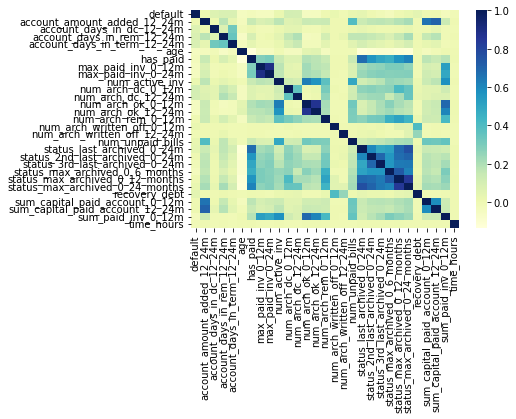

In [12]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [13]:
num_col = ['age',
           'account_amount_added_12_24m',
           'account_days_in_dc_12_24m',
           'account_days_in_rem_12_24m',
           'account_days_in_term_12_24m',
           'max_paid_inv_0_12m',
           'max_paid_inv_0_24m',
           'num_active_inv',
           'num_arch_ok_0_12m',
           'num_arch_ok_12_24m',
           'num_arch_rem_0_12m',
           'num_arch_written_off_0_12m',
           'num_arch_written_off_12_24m',
           'num_unpaid_bills',
           'recovery_debt',
           'sum_capital_paid_account_0_12m',
           'sum_paid_inv_0_12m']

cat_col = ['status_last_archived_0_24m',
           'status_max_archived_0_6_months',
           'status_max_archived_0_12_months',
           'has_paid']

In [14]:
df.status_last_archived_0_24m.value_counts()

1    64594
0    16887
2     7054
3     1439
5        2
Name: status_last_archived_0_24m, dtype: int64

In [36]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.model_selection import cross_val_score, GridSearchCV

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, num_col),
    ('cat_tr', cat_transformer, cat_col)], remainder='drop')

In [37]:
pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', LogisticRegression(max_iter=1000,solver='liblinear'))
])

In [38]:
X = df.drop(columns = ['default'])
y = df['default']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
score_baseline = cross_val_score(pipe, X, y, cv=5, scoring='recall').mean()

In [41]:
score_baseline

0.01397460260006636

In [25]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_tr',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                               

In [26]:
X_train_rescaled = preprocessor.fit_transform(X_train)

In [27]:
X_train_rescaled = pd.DataFrame(X_train_rescaled)

In [44]:
X_train_rescaled

0          1    2    3    4         5         6    7         8   \
0      0.15  18.128276  0.0  0.0  0.0  0.422745  0.680896  2.0  0.000000   
1      0.40   9.223054  0.0  0.0  0.0  0.347141  0.162389  0.0  0.285714   
2     -0.30   0.000000  0.0  0.0  0.0 -0.047918  1.444885  0.0 -0.142857   
3      0.45   0.000000  0.0  0.0  0.0  1.125546  1.597208  0.0  1.142857   
4      1.25   5.420296  0.0  0.0  0.0  0.015973 -0.132950  1.0  0.000000   
...     ...        ...  ...  ...  ...       ...       ...  ...       ...   
71975  0.20   0.000000  0.0  0.0  0.0  2.029603  1.662829  0.0  0.142857   
71976  0.85   1.469360  0.0  0.0  0.0  0.327015  0.144441  0.0  0.000000   
71977  1.45   1.560591  0.0  0.0  0.0 -0.026621 -0.028489  2.0  9.571429   
71978  0.80  12.074286  0.0  4.0  0.0 -0.642104 -0.529902  0.0 -0.285714   
71979  1.15   0.000000  0.0  0.0  0.0  0.241827  0.227440  2.0  0.857143   

              9   ...   23   24   25   26   27   28   29   30   31   32  
0       0.000000  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1       0.000000  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
2       0.666667  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
3       4.166667  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4      -0.333333  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
71975  -0.333333  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
71976   0.000000  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
71977  12.166667  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
71978  -0.166667  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
71979   0.833333  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  

[71980 rows x 33 columns]

In [57]:
SimpleImputer.get_feature_names_out = (lambda self, names=None: self.feature_names_in_)

In [58]:
pd.DataFrame(X_train_rescaled,
             columns=preprocessor.get_feature_names_out())

AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names_out'

In [59]:
## get pipeline feature names
preprocessor.get_feature_names_out()

## specify feature names as your columns
pd.DataFrame(preprocessor.transform(X_train),
             columns=preprocessor[:-1].get_feature_names_out(),
             index=X_train.index)

AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names_out'

In [43]:
#pipe.named_steps['preproc'].transformers_[1][1]\
#   .named_steps['onehot'].get_feature_names(cat_col)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
SimpleImputer.get_feature_names_out = (lambda self, names=None: self.feature_names_in_)

In [47]:
vif = pd.DataFrame()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#getting all VIFs in a single table
vif = pd.DataFrame()

vif["features"] = X_train_rescaled.columns

vif["vif_index"] = [vif(X_train_rescaled.values, i) for i in range(X_train_rescaled.shape[1])]

round(vif.sort_values(by="vif_index", ascending = False),2)

TypeError: 'DataFrame' object is not callable